<a href="https://colab.research.google.com/github/rajeshgayathri2003/CBSE-Art-Integration/blob/main/dl_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision
import torch.nn as nn
import torch.optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets

In [ ]:
import datetime
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
import zipfile
import os

# Path to the ZIP file in Google Drive
zip_path = "/content/drive/MyDrive/dataset/inaturalist_12K.zip"

# Destination folder for unzipped files
destination_path = '/content/dataset'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)

print(f'Files unzipped to: {destination_path}')

Files unzipped to: /content/dataset


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

dataset_path = "/content/dataset/inaturalist_12K/train"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
dataset_path = "/content/dataset/inaturalist_12K/val"
dataset_validate = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader_validate = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

In [ ]:
for i in dataloader:
  inputs, labels = i
  print(inputs.shape)
  print(labels.shape)
  break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([32, 3, 224, 224])
torch.Size([32])


In [ ]:
class Naturalist(nn.Module):
  def __init__(self):
    super(Naturalist, self).__init__()

    self.softmax = nn.Softmax()
    self.flatten = nn.Flatten()
    self.conv_1_1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(64),
                                  nn.ReLU(inplace=False))
    self.conv_1_2 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(64),
                                  nn.ReLU(inplace=False),
                                  nn.MaxPool2d(kernel_size=2, stride=2))
    self.conv_2_1 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(128),
                                  nn.ReLU(inplace=False))
    self.conv_2_2 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(128),
                                  nn.ReLU(inplace=False),
                                  nn.MaxPool2d(kernel_size=2, stride=2))
    self.conv_3_1 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(256),
                                  nn.ReLU(inplace=False))
    self.conv_3_2 = nn.Sequential(nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(256),
                                  nn.ReLU(inplace=False))
    self.conv_3_3 = nn.Sequential(nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(256),
                                  nn.ReLU(inplace=False),
                                  nn.MaxPool2d(kernel_size=2, stride=2))
    self.conv_4_1 = nn.Sequential(nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(512),
                                  nn.ReLU(inplace=False))
    self.conv_4_2 = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(512),
                                  nn.ReLU(inplace=False))
    self.conv_4_3 = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False),
                                 nn.BatchNorm2d(512),
                                 nn.ReLU(inplace=False),
                                 nn.MaxPool2d(kernel_size=2, stride=2))
    self.conv_5_1 = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(512),
                                  nn.ReLU(inplace=False))
    self.conv_5_2 = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(512),
                                  nn.ReLU(inplace=False))
    self.conv_5_3 = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(512),
                                  nn.ReLU(inplace=False),
                                  nn.MaxPool2d(kernel_size=2, stride=2))
    self.fc = nn.Sequential(nn.Dropout(0.5), nn.Linear(512*7*7, 4096), nn.ReLU(inplace=False))
    self.fc_1 = nn.Sequential(nn.Dropout(0.5), nn.Linear(4096, 4096), nn.ReLU(inplace=False))
    self.fc_2 = nn.Sequential(nn.Linear(4096, 10))
    self.initialise_weights()


  def forward(self, x):
    out = self.conv_1_1(x)
    out = self.conv_1_2(out)


    out = self.conv_2_1(out)
    out = self.conv_2_2(out)


    out = self.conv_3_1(out)
    out = self.conv_3_2(out)
    out = self.conv_3_3(out)


    out = self.conv_4_1(out)
    out = self.conv_4_2(out)
    out = self.conv_4_3(out)


    out = self.conv_5_1(out)
    out = self.conv_5_2(out)
    out = self.conv_5_3(out)


    out = self.flatten(out)
    out = self.fc(out)
    out = self.fc_1(out)
    out = self.fc_2(out)
    #print(np.shape(x))
    return out


  def initialise_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0, 0.01)
        nn.init.constant_(m.bias, 0)


In [ ]:
model = Naturalist()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 1e-3, momentum=0.9)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Naturalist(
  (softmax): Softmax(dim=None)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_1_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_1_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2_1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_2_2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum

In [ ]:
print(device)

cuda


In [ ]:
EPOCHS = 5

timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('/content/trainer_{}'.format(timestamp))

for epoch in range(EPOCHS):
  print('EPOCH {}:'.format(epoch + 1))
  model.train(True)

  running_loss = 0
  last_loss = 0

  for (i, data) in enumerate(dataloader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimiser.step()

    running_loss+=loss.item()


    if i % 32 == 31:

      last_loss = running_loss / 32 # loss per batch

      print('  batch {} loss: {}'.format(i + 1, last_loss))
      tb_x = epoch * len(dataloader) + i + 1
      writer.add_scalar('Loss/train', last_loss, tb_x)
      running_loss = 0

  avg_loss = last_loss

  runningvloss = 0
  with torch.no_grad():
    for j, vdata in enumerate(dataloader_validate):
      valinputs, valdata = vdata
      valinputs, valdata = valinputs.to(device), valdata.to(device)
      valoutputs = model(valinputs)
      valloss = loss_fn(valoutputs, valdata)
      runningvloss += valloss.item()

  avg_vloss = runningvloss / (len(dataloader_validate))
  print('LOSS validation {}'.format(avg_vloss))


  print('LOSS train {}'.format(avg_loss))
  writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch + 1)
  writer.flush()

  model_path = 'model_{}_{}'.format(timestamp, epoch)
  torch.save(model.state_dict(), model_path)

Streaming output truncated to the last 5000 lines.
torch.Size([32, 64, 112, 112])
torch.Size([32, 128, 56, 56])
torch.Size([32, 256, 28, 28])
torch.Size([32, 512, 14, 14])
torch.Size([32, 512, 7, 7])
torch.Size([32, 25088])
torch.Size([32, 64, 112, 112])
torch.Size([32, 128, 56, 56])
torch.Size([32, 256, 28, 28])
torch.Size([32, 512, 14, 14])
torch.Size([32, 512, 7, 7])
torch.Size([32, 25088])
torch.Size([32, 64, 112, 112])
torch.Size([32, 128, 56, 56])
torch.Size([32, 256, 28, 28])
torch.Size([32, 512, 14, 14])
torch.Size([32, 512, 7, 7])
torch.Size([32, 25088])
torch.Size([32, 64, 112, 112])
torch.Size([32, 128, 56, 56])
torch.Size([32, 256, 28, 28])
torch.Size([32, 512, 14, 14])
torch.Size([32, 512, 7, 7])
torch.Size([32, 25088])
torch.Size([32, 64, 112, 112])
torch.Size([32, 128, 56, 56])
torch.Size([32, 256, 28, 28])
torch.Size([32, 512, 14, 14])
torch.Size([32, 512, 7, 7])
torch.Size([32, 25088])
torch.Size([32, 64, 112, 112])
torch.Size([32, 128, 56, 56])
torch.Size([32, 256, 28

In [ ]:
saved_model = Naturalist()

In [60]:
saved_model.load_state_dict(torch.load('/content/model_20241220_174353_4'))

<ipython-input-60-d44ce72d5e06>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model.load_state_dict(torch.load('/content/model_20241220_174353_4'))


<All keys matched successfully>

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


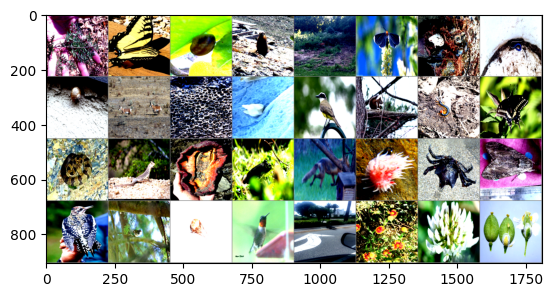

tensor([8, 5, 7, 6, 6, 5, 1, 9, 7, 6, 1, 6, 3, 6, 1, 5, 9, 9, 7, 0, 6, 7, 1, 5,
        3, 3, 2, 3, 9, 8, 8, 8])


In [64]:
from matplotlib import pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(dataloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
classes = { 0:'Amphibia', 1: 'Animalia', 2: 'Arachnida', 3: 'Aves', 4: 'Fungi', 5:'Insecta', 6:'Mammalia', 7: 'Mollusca', 8:'Plantae', 9: 'Reptilia'}
print(labels)


In [65]:
outputs = saved_model(images)
_, predicted = torch.max(outputs, 1)

print(labels)
print(predicted)

torch.Size([32, 64, 112, 112])
torch.Size([32, 128, 56, 56])
torch.Size([32, 256, 28, 28])
torch.Size([32, 512, 14, 14])
torch.Size([32, 512, 7, 7])
torch.Size([32, 25088])
tensor([8, 5, 7, 6, 6, 5, 1, 9, 7, 6, 1, 6, 3, 6, 1, 5, 9, 9, 7, 0, 6, 7, 1, 5,
        3, 3, 2, 3, 9, 8, 8, 8])
tensor([9, 4, 5, 9, 6, 5, 7, 9, 9, 9, 8, 3, 3, 3, 8, 5, 9, 0, 4, 5, 6, 7, 9, 0,
        7, 5, 2, 5, 6, 8, 8, 3])
